In [299]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from abc import ABCMeta, abstractmethod
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import seaborn as sbn

prob_to_class = np.vectorize(lambda x: 0 if (x < 0.5) else 1)

In [165]:
class LinearLayer :
    def __init__(self,in_features, out_features):
        self.weights = np.random.randn(out_features, in_features) * np.sqrt(2 / in_features)
        self.bias = np.zeros((out_features,1))
        
    def forward(self,X):
        self.X = X
        return np.dot(self.weights,X) + self.bias
    
    def backward(self, grad):
        m = X.shape[1]
        self.grad_w = np.dot(grad, self.X.T) / m
        self.grad_b = np.sum(grad, axis=1, keepdims=True) / m
        d = np.dot(self.weights.T,grad)
        return d
    
    def updateParameters(self, learningRate):
        self.weights = self.weights - learningRate*self.grad_w
        self.bias = self.bias - learningRate*self.grad_b


In [313]:
class SigmoidLayer:
    
    def forward(self,Z):
        self.Z = Z
        self.activation = 1 / (1 + np.exp(-Z))
        return self.activation
    
    def backward(self, grad):
        return grad * self.activation * (1 - self.activation)
    
    def updateParameters(self, learingRate):
        return
        

In [327]:
class ReluLayer:
    
    def forward(self, Z):
        self.Z = Z
        self.activation = np.maximum(0,Z)
        return self.activation
    
    def backward(self, grad):
        new_grad = np.array(grad, copy = True)
        new_grad[self.Z < 0] = 0
        return new_grad
    
    def updateParameters(self,learningRate):
        return

In [359]:
class CostLayer:
    
    def forward(self, AL, Y):
        self.AL = AL
        self.Y = Y
        self.numExamples = Y.shape[1]
        cost = -(np.dot(np.log(AL),self.Y.T) + np.dot(np.log(1-AL), (1-self.Y.T))) / self.numExamples
        cost = np.squeeze(cost)
        return cost
    
    def backward(self):
        return -(np.divide(self.Y, self.AL) - np.divide(1 - self.Y, 1 - self.AL))

In [360]:
class LogisticRegressionNetwork:
    def __init__(self, in_features):
        self.in_features = in_features
        self.reset()
        
    def reset(self):
        self.linearLayer = LinearLayer(self.in_features, 1)
        self.sigmoidLayer = SigmoidLayer()
        self.costLayer = CostLayer()
        
    def forward(self,X,Y):
        f1 = self.linearLayer.forward(X)
        f2 = self.sigmoidLayer.forward(f1)
        cost = self.costLayer.forward(f2,Y)
        return cost
    
    def backward(self):
        b1 = self.costLayer.backward()
        b2 = self.sigmoidLayer.backward(b1)
        b3 = self.linearLayer.backward(b2)
    
    def updateParameters(self, learningRate):
        self.linearLayer.updateParameters(learningRate)
        
    def train(self, X,Y, epochs = 10, learningRate = 0.1):
        costs = []
        self.reset()
        for epoch in range(0,epochs):
            cost = self.forward(X,Y)
            self.backward()
            self.updateParameters(learningRate)
            costs.append(cost)
        return costs
            
    def predict(self,X,Y):
        self.forward(X,Y)
        return prob_to_class(self.sigmoidLayer.activation)

In [361]:
class FeedForwardNeuralNetwork:
    def __init__(self, layer_dims):
        self.layers = []
        self.layer_dims = layer_dims
        dim_in = layer_dims[0]
        for i in range(1, len(layer_dims)):
            dim_out = layer_dims[i]
            self.layers.append(LinearLayer(dim_in, dim_out))
            #The last activation function is sigmoid to perform classification
            if (i == len(layer_dims)-1):
                self.layers.append(SigmoidLayer())
            else:
                self.layers.append(ReluLayer())
            dim_in = dim_out
        self.costLayer = CostLayer()
        
    def forward(self,X,Y):
        A = X
        for i in range(0,len(self.layers)):
            A = self.layers[i].forward(A)
        cost = self.costLayer.forward(A,Y)
        return cost
    
    def backward(self):
        derivatives = self.costLayer.backward()
        for i in reversed(range(0,len(self.layers))):
            derivatives = self.layers[i].backward(derivatives)
            
    def updateParameters(self, learningRate):
        for i in range(0,len(self.layers)):
            self.layers[i].updateParameters(learningRate)
            
    def train(self, X,Y, epochs = 10, learningRate = 0.01):
        costs = []
        self.__init__(self.layer_dims)
        for epoch in range(0,epochs):
            cost = self.forward(X,Y)
            self.backward()
            self.updateParameters(learningRate)
            costs.append(cost)
        return costs
            
    def predict(self,X,Y):
        self.forward(X,Y)
        return prob_to_class(self.layers[len(self.layers)-1].activation)
        
    

In [362]:
samples = 1000
X, y = datasets.make_classification(n_samples=samples, n_features=50)

In [363]:
y = np.reshape(a=y,newshape=(1,samples))
X = X.T

In [364]:
print("X shape = ", X.shape)
print("y shape = ", y.shape)

X shape =  (50, 1000)
y shape =  (1, 1000)


In [365]:
lr_model = LogisticRegressionNetwork(50)

Train cost =  0.25117441535211205


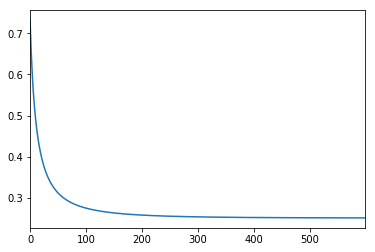

In [366]:
costs = lr_model.train(X,y,epochs=600,learningRate=0.1)
sbn.tsplot(costs)
print("Train cost = ", costs[len(costs)-1])

In [367]:
pred = lr_model.predict(X,y)

In [368]:
NN_model = FeedForwardNeuralNetwork([50,10,1])

Train cost =  0.04776162461475552


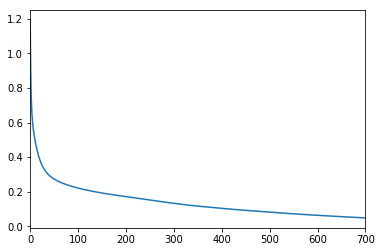

In [371]:
costs = NN_model.train(X,y,epochs=700,learningRate=0.3)
sbn.tsplot(costs)
print("Train cost = ", costs[len(costs)-1])

In [370]:
pred = NN_model.predict(X,y)